# Experiment result:

## test crop model on crop dataset

| test_size |0 | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 | 90 | 100 | 
|-|
| 0 | 0.8320 | 0.7642 | 0.6680 | 0.5335 | 0.3753 | 0.2281 | 0.1159 | 0.0594 | 0.0361 | 0.0210 | 0.0116 | 
| all | 0.7951 | 0.7633 | 0.7196 | 0.6613 | 0.5873 | 0.4929 | 0.3842 | 0.2673 | 0.1377 | 0.0321 | 0.0146 | 
| increase | -0.0370 | -0.0009 | 0.0516 | 0.1278 | 0.2120 | 0.2648 | 0.2683 | 0.2079 | 0.1016 | 0.0111 | 0.0030 | 


| test_size |0\% & 10\% & 20\% & 30\% & 40\% & 50\% & 60\% & 70\% & 80\% & 90\% & 100\% & 
|-|
| crop_obj_0 | 0.830 & 0.762 & 0.676 & 0.582 & 0.486 & 0.394 & 0.314 & 0.248 & 0.196 & 0.166 & 0.153 & 
| every_all | 0.804 & 0.759 & 0.708 & 0.655 & 0.595 & 0.530 & 0.461 & 0.392 & 0.327 & 0.278 & 0.249 & 


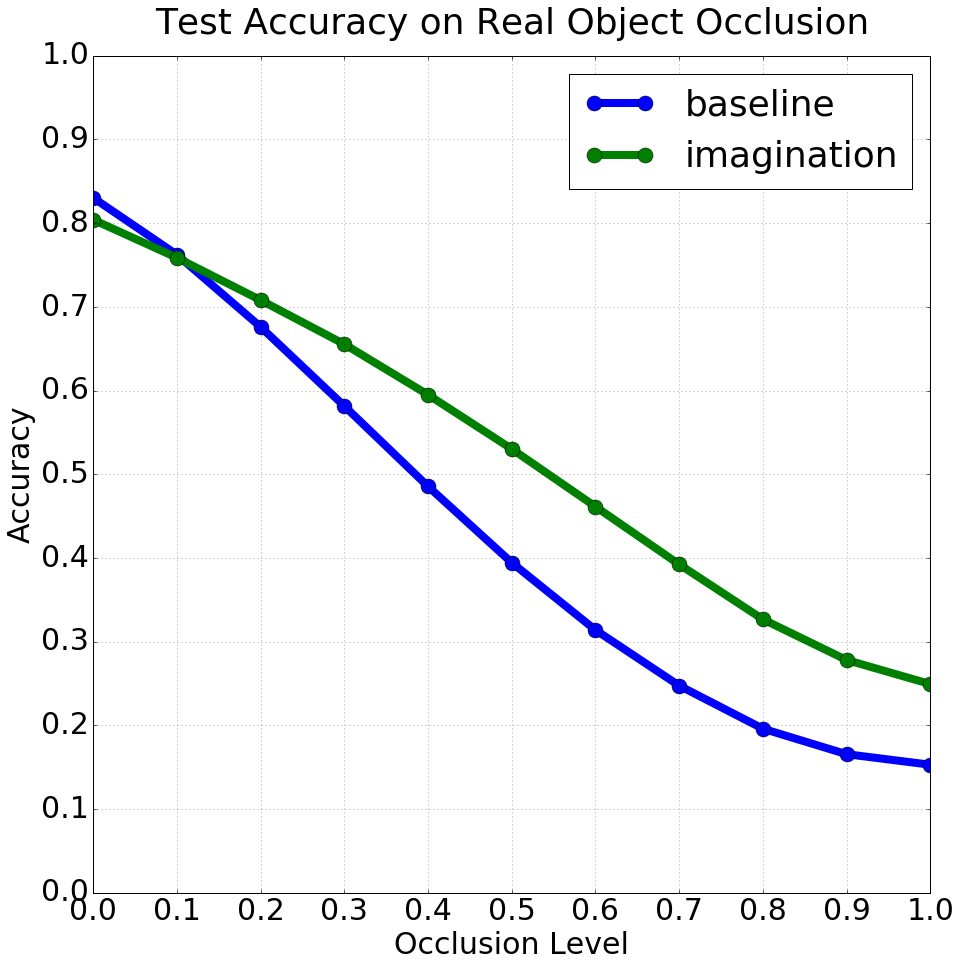

| increase | -0.026 & -0.004 & 0.032 & 0.074 & 0.109 & 0.136 & 0.147 & 0.145 & 0.131 & 0.113 & 0.096 & 


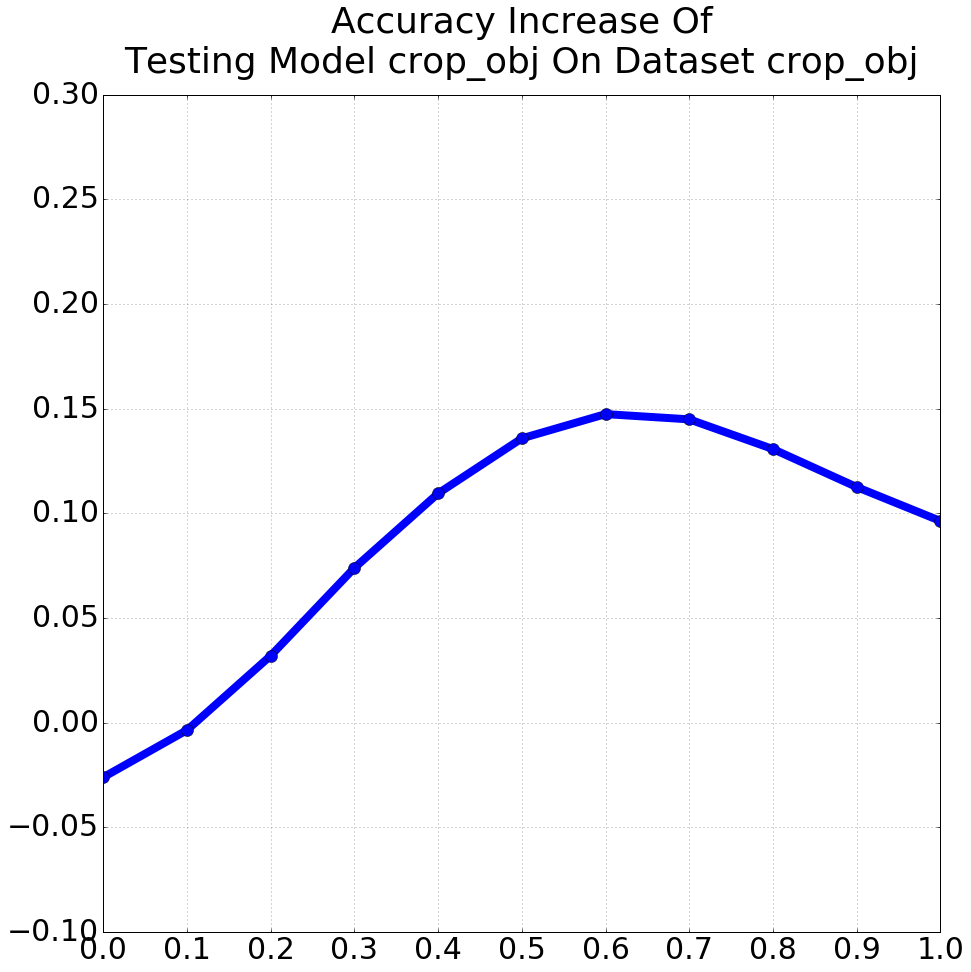

| increase | 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 


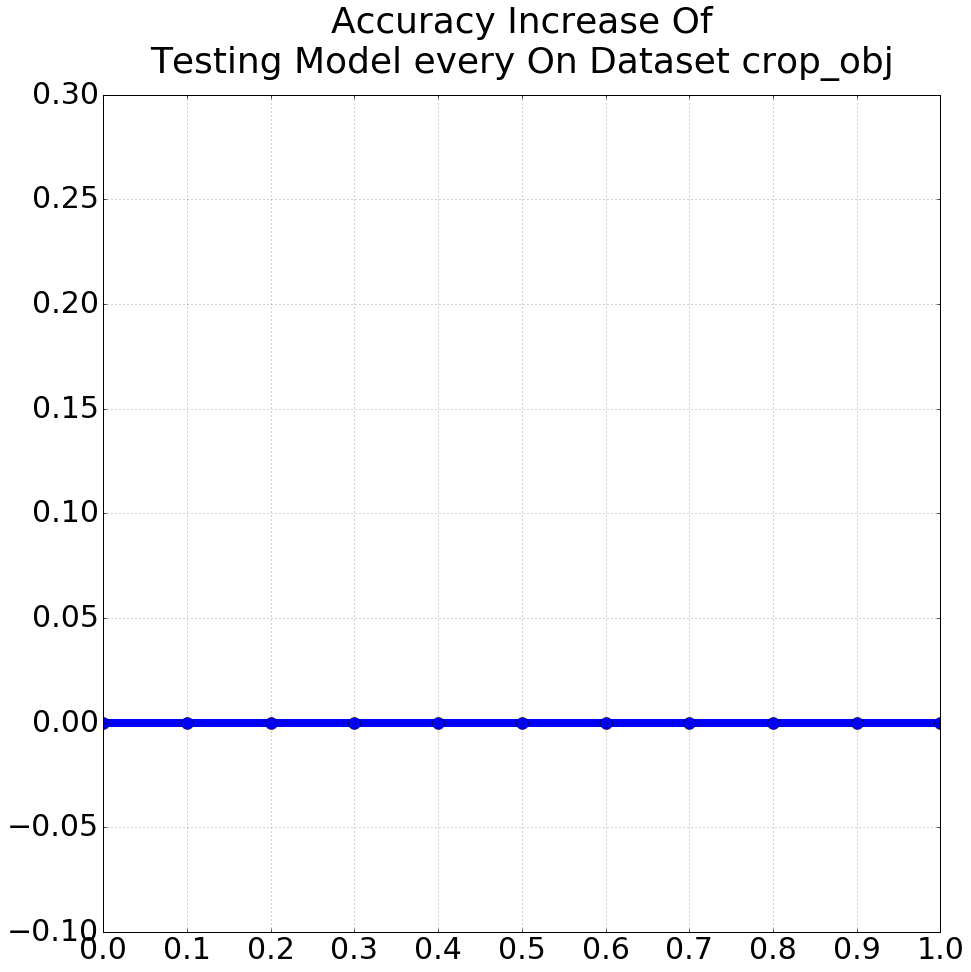

"\nif len(model_type_strs) == 1:\n    # Plot 3D surface of accuracy = f(model_size, test_size)\n    test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Y\n    model_size = test_size # X\n    accuracies = [[0 for i in range(11)] for j in range(11)]\n    for i, size in enumerate(model_size):\n        with open('{}test/accuracy_aperture_{}_aperture_{}.pickle'.format(result_root, int(size * 100))) as f:\n            accuracy = cPickle.load(f)\n        accuracies[i] = accuracy\n    for i in accuracies:\n        for en, j in enumerate(i):\n            sys.stdout.write(str(j))\n            if en == len(i) - 1:\n                sys.stdout.write('\n')\n            else:\n                sys.stdout.write(',')\n"

In [25]:
# Test result visualization.
from constant import *
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import cPickle
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams.update({'font.size': 30})


############ model: every_all ###########
models = [('crop_obj', ['0']),
          ('every', ['all'])]
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'imagination']
test_type_str_to_name = {'crop': 'Rectangular', 'aperture': 'Aperture', 'crop_obj': 'Real Object'}

############ Test Dataset: crop / nocrop ############
'''
models = [('crop',   ['0', '20', '40', '60', '80', '100', 'all']),
          ('nocrop', ['0', '20', '40', '60', '80', '100', 'all'])]
test_type_strs = ['crop', 'nocrop']
model_size = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['0']), ('every', ['all'])]
test_type_strs = ['crop']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['0', 'all']),
          ('aperture', ['all']),
          ('crop_obj', ['all']),
          ('every', ['all'])]
test_type_strs = ['crop']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'img-rect-all', 'img-aper-all', 'img-obj-all', 'imagination']
'''
############ Test Dataset: aperture ############
'''
models = {'aperture': ['100', 'all']}
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = {'crop': ['all'],
          'aperture': ['100', 'all'],
          'crop_obj': ['all'],
          'every': ['all']}
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['all']),
          ('aperture', ['100', 'all']),
          ('crop_obj', ['all']),
          ('every', ['all'])]
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['img-rect-all', 'baseline', 'img-aper-all', 'img-obj-all', 'imagination']
'''
############ Test Dataset: crop_obj ############
'''
models = {'crop_obj': ['0', 'all']}
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['all']),
          ('aperture', ['all']),
          ('crop_obj', ['0', 'all']),
          ('every', ['all'])]
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['img-rect-all', 'img-aper-all', 'baseline', 'img-obj-all', 'imagination']
'''

def load_accuracy(model_type_str, model_name, test_type_str, test_size):
    accuracy = []
    for size in test_size:
        test_name = int(100 * size)
        with open('{}test/accuracy_{}_{}_{}_{}.pickle'.\
                  format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
            acc = cPickle.load(f)
        accuracy.append(acc)
    if test_type_str == 'aperture':
        accuracy.reverse()
    return accuracy

def load_accuracy_divide(divide_sum, model_type_str, model_name, test_type_str, test_size):
    accuracy = []
    for size in test_size:
        test_name = int(100 * size)
        with open('{}test/accuracy_divide_{}_{}_{}_{}_{}.pickle'.\
                  format(result_root, divide_sum, model_type_str, model_name, test_type_str, test_name)) as f:
            acc, divide_length = cPickle.load(f)
        accuracy.append((acc, divide_length))
    return accuracy

def plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size):
    accuracy = load_accuracy_divide(10, model_type_str, model_name, test_type_str, test_size)
    
    accuracy_mean = [0.0 for i in range(len(accuracy))]
    for test_index, (acc, divide_length) in enumerate(accuracy):
        for divide_index in range(len(acc)):
            accuracy_mean[test_index] += acc[divide_index] * divide_length[divide_index]
        accuracy_mean[test_index] /= sum(divide_length)
        
    accuracy_std = [0.0 for i in range(len(accuracy))]
    for test_index, (acc, divide_length) in enumerate(accuracy):
        for divide_index in range(len(acc)):
            accuracy_std[test_index] += ((acc[divide_index] - accuracy_mean[test_index]) ** 2) * divide_length[divide_index]
        accuracy_std[test_index] = (accuracy_std[test_index] / sum(divide_length)) ** 0.5
    print model_type_str, model_name, test_type_str, test_size
    print accuracy_std
    eb = plt.errorbar(test_size, accuracy_mean, yerr=accuracy_std, \
             fmt = '-o', markersize = 5, linewidth = 3, elinewidth = 3, capsize = 10, capthick = 3, barsabove = True)
    #eb[-1][0].set_linestyle('--')
    
test_size_sq = [i * i for i in test_size]
test_size_sqrt = [math.sqrt(i) for i in test_size]
for test_type_str in test_type_strs:
    if [m[0] for m in models] == sorted(['crop', 'nocrop']):
        # Plot each (model_type_str, test_type_str).
        for model_type_str, model_names in models:
            # Grid.
            fig = plt.figure()
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.1
            y_range = [0, 1]
            y_unit = 0.1
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            ax.set_xlabel('Occlusion Level')
            ax.set_ylabel('Accuracy')
            plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)
            legends = []
            for model_name in model_names:
                accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
                plt.plot(test_size, accuracy, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
                #plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size)
                if 'all' in model_name:
                    legends.append('imagination'.format('img_rect', model_name))
                else:
                    legends.append('{}-{}'.format('img-rect', model_name))
            plt.legend(legends, loc='upper right')
            plt.show()
            fig.savefig('{}test/test_curve_{}_{}.png'.format(result_root, model_type_str, test_type_str))
            
        # Plot each (test_type_str, model_type_str).
        for model_type_str, model_names in models:
            # Grid.
            fig = plt.figure()
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.2
            y_range = [0, 1]
            y_unit = 0.1
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            ax.set_xlabel('Network')
            ax.set_ylabel('Accuracy')
            plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)
            legends = []
            accuracy_every = np.zeros((len(model_size), len(test_size)))
            for i, size in enumerate(model_size):
                model_name = str(int(size * 100))
                accuracy_every[i] = load_accuracy(model_type_str, model_name, test_type_str, test_size)
            for i, size in enumerate(test_size):
                if int(size * 100) % 20 != 0:
                    continue
                plt.plot(model_size, accuracy_every[:, i], marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
                legends.append('{}%'.format(int(size * 100)))
            plt.legend(legends, loc='upper right')
            plt.show()
            fig.savefig('{}test/test_curve_by_testdataset_{}_{}.png'.format(result_root, model_type_str, test_type_str))
    
    # Plot each (test_type_str).
    # Grid.
    fig = plt.figure()
    ax = plt.gca()
    x_range = [0, 1]
    x_unit = 0.1
    y_range = [0, 1]
    y_unit = 0.1
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel('Occlusion Level')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
    ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))    
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
    ax.grid(which='both')                                                            
    ax.grid(which='minor', alpha=0.2)                                                
    ax.grid(which='major', alpha=0.5)   
    plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)

    # Print table.
    sys.stdout.write('| test_size |')
    for size in test_size:
        sys.stdout.write('{}\\% & '.format(int(size * 100)))
    sys.stdout.write('\n|-|\n')
    legends = []
    for model_type_str, model_names in models:
        for model_name in model_names:
            accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
            plt.plot(test_size, accuracy, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 15.0)
            #plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size)
            legends.append('{}_{}'.format(model_type_str, model_name))
            # Print table.
            
            sys.stdout.write('| {}_{} | '.format(model_type_str, model_name))
            for x in accuracy:
                sys.stdout.write('{:.3f} & '.format(x))
            sys.stdout.write('\n')
    plt.legend(legend_names, loc='upper right')
    plt.show()
    fig.savefig('{}test/test_curve_{}_{}.png'.format(result_root, [m[0] for m in models], test_type_str))

    # Plot accuracy increase.
    for model_type_str, model_names in models:
        if models[1] == ('every', ['all']):
            accuracy_base = np.array(load_accuracy(model_type_str, model_names[0], test_type_str, test_size))
            #accuracy_all = np.array(load_accuracy(model_type_str, model_names[1], test_type_str, test_size))
            accuracy_all = np.array(load_accuracy('every', 'all', test_type_str, test_size))
            accuracy_increase = accuracy_all - accuracy_base

            sys.stdout.write('| increase | ')
            for x in accuracy_increase:
                sys.stdout.write('{:.3f} & '.format(x))
            sys.stdout.write('\n')

            # Grid.
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.10
            y_range = [-0.1, 0.3]
            y_unit = 0.05
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                        
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            plt.title('Accuracy Increase Of\nTesting Model {} On Dataset {}'.format(model_type_str, test_type_str), y = 1.02)
            plt.plot(test_size, accuracy_increase, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
            plt.show()
            fig.savefig('{}test/test_curve_{}_{}_increase.png'.format(result_root, model_type_str, test_type_str))
            
'''
if len(model_type_strs) == 1:
    # Plot 3D surface of accuracy = f(model_size, test_size)
    test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Y
    model_size = test_size # X
    accuracies = [[0 for i in range(11)] for j in range(11)]
    for i, size in enumerate(model_size):
        with open('{}test/accuracy_aperture_{}_aperture_{}.pickle'.format(result_root, int(size * 100))) as f:
            accuracy = cPickle.load(f)
        accuracies[i] = accuracy
    for i in accuracies:
        for en, j in enumerate(i):
            sys.stdout.write(str(j))
            if en == len(i) - 1:
                sys.stdout.write('\n')
            else:
                sys.stdout.write(',')
'''
                
        
        